In [1]:
### Importing Data and Libraries

In [2]:
import os

from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


%matplotlib inline
import matplotlib.pyplot as plt

import re
import pandas as pd
import random
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

import numpy as np

PATH = os.chdir("C:/Users/amant/Cute 7321")

Using TensorFlow backend.


In [3]:
train = pd.read_csv("train-1546603042473.csv")
test = pd.read_csv("test-1546603743049.csv")

In [4]:
## Data Analysis

In [5]:
train.head(5) 

categories                                           converse
0  QUERIES FROM PHARMACY  please to verify instructions for drugname pat...
1        NEW APPOINTMENT  lmovm for patients mother to and schd rov trac...
2                 OTHERS  labtype and insurance approval other incoming ...
3                 OTHERS  clinical list changes medfusion secure electro...
4     MEDICATION RELATED  wants to wean off medication work phone name d...

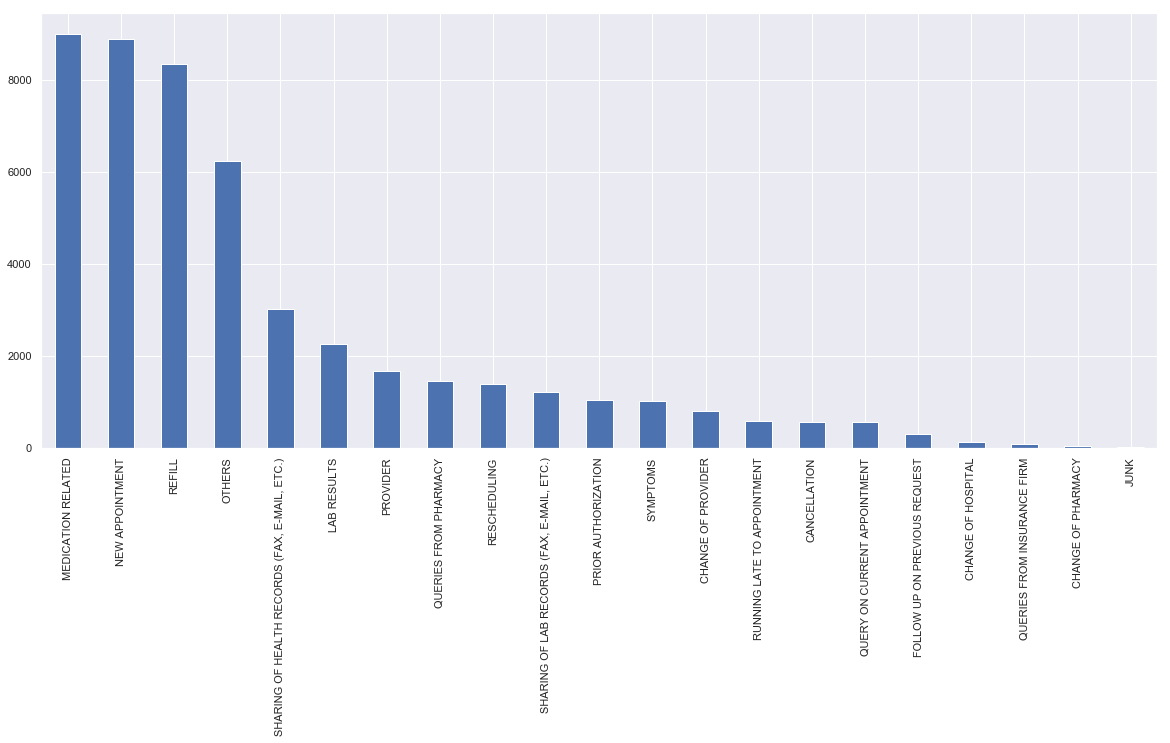

In [6]:
import matplotlib.pyplot as plt

my_categories = ['MEDICATION RELATED','NEW APPOINTMENT','REFILL ','OTHERS','SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)','LAB RESULTS','PROVIDER','QUERIES FROM PHARMACY','RESCHEDULING','SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)','PRIOR AUTHORIZATION','SYMPTOMS','CHANGE OF PROVIDER','RUNNING LATE TO APPOINTMENT','CANCELLATION','QUERY ON CURRENT APPOINTMENT','FOLLOW UP ON PREVIOUS REQUEST','CHANGE OF HOSPITAL','QUERIES FROM INSURANCE FIRM','CHANGE OF PHARMACY','JUNK ']
plt.figure(figsize=(20,8))
train.categories.value_counts().plot(kind='bar');

In [7]:
#Category distribution in train data
train.iloc[:,0].value_counts()

MEDICATION RELATED                               9010
NEW APPOINTMENT                                  8907
REFILL                                           8347
OTHERS                                           6253
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)    3018
LAB RESULTS                                      2253
PROVIDER                                         1677
QUERIES FROM PHARMACY                            1464
RESCHEDULING                                     1383
SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)       1212
PRIOR AUTHORIZATION                              1043
SYMPTOMS                                         1021
CHANGE OF PROVIDER                                811
RUNNING LATE TO APPOINTMENT                       590
CANCELLATION                                      564
QUERY ON CURRENT APPOINTMENT                      559
FOLLOW UP ON PREVIOUS REQUEST                     304
CHANGE OF HOSPITAL                                127
QUERIES FROM INSURANCE FIRM 

In [8]:
#Data Imbalance?

In [9]:
#Checking for NUll Values
train.isnull().sum()
#Too few Nulls to take note

categories     0
converse      32
dtype: int64

In [10]:
# Replacing Nulls 
train1 = train.replace(np.nan, 'Empty', regex= True)

In [11]:
train.shape

(48699, 2)

In [12]:
train1.shape

(48699, 2)

In [13]:
# Data analysis for Test Data

In [14]:
test.shape

(8581, 2)

In [15]:
#Checking for NUll Values
test.isnull().sum()
#Too few Nulls to take note

id          0
converse    4
dtype: int64

In [16]:
# Replacing Nulls 
test1 = test.replace(np.nan, 'Empty', regex= True)

In [17]:
test1.shape

(8581, 2)

In [18]:
train1.head(5)

categories                                           converse
0  QUERIES FROM PHARMACY  please to verify instructions for drugname pat...
1        NEW APPOINTMENT  lmovm for patients mother to and schd rov trac...
2                 OTHERS  labtype and insurance approval other incoming ...
3                 OTHERS  clinical list changes medfusion secure electro...
4     MEDICATION RELATED  wants to wean off medication work phone name d...

In [19]:
# Max length etc Analysis

In [20]:
#No. of words in "converse" column in train
train1["word_count"] = train1['converse'].apply(lambda x: len(str(x).split()))
train1.head()

categories                                           converse  \
0  QUERIES FROM PHARMACY  please to verify instructions for drugname pat...   
1        NEW APPOINTMENT  lmovm for patients mother to and schd rov trac...   
2                 OTHERS  labtype and insurance approval other incoming ...   
3                 OTHERS  clinical list changes medfusion secure electro...   
4     MEDICATION RELATED  wants to wean off medication work phone name d...   

   word_count  
0          35  
1          16  
2          79  
3         115  
4         129

In [21]:
#No. of words in "converse" column in test
test1["word_count"] = test1['converse'].apply(lambda x: len(str(x).split()))
test1.head()

id                                           converse  word_count
0   1  request to speak with rn no given patients ref...         158
1   2  patients husband ret name spouse for other pat...          22
2   3  fyi in his szs mom other he has an appointment...         164
3   4  Rx refill drugname from pharmacy name reason f...          97
4   5  need more time for testing dad is requesting a...          97

In [22]:
train1.describe(include='all')
# Max word lenth is 463 and the average length is 82 words

categories                                           converse  \
count                48699                                              48699   
unique                  21                                              47265   
top     MEDICATION RELATED  clinical list changes medfusion secure electro...   
freq                  9010                                                142   
mean                   NaN                                                NaN   
std                    NaN                                                NaN   
min                    NaN                                                NaN   
25%                    NaN                                                NaN   
50%                    NaN                                                NaN   
75%                    NaN                                                NaN   
max                    NaN                                                NaN   

          word_count  
count   48699.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean       81.981396  
std        52.518927  
min         1.000000  
25%        39.000000  
50%        74.000000  
75%       120.000000  
max       463.000000

In [23]:
test1.describe(include='all')

id                                           converse  \
count   8581.000000                                               8581   
unique          NaN                                               8427   
top             NaN  clinical list changes medfusion secure electro...   
freq            NaN                                                 33   
mean    4291.000000                                                NaN   
std     2477.265663                                                NaN   
min        1.000000                                                NaN   
25%     2146.000000                                                NaN   
50%     4291.000000                                                NaN   
75%     6436.000000                                                NaN   
max     8581.000000                                                NaN   

         word_count  
count   8581.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean      82.586412  
std       53.376353  
min        1.000000  
25%       39.000000  
50%       74.000000  
75%      121.000000  
max      652.000000

In [24]:
#Train Test Split

In [25]:
x = train1.iloc[:, 1].values
y = train1.iloc[:, 0].values
y.shape

(48699,)

In [26]:
y_test = test1.iloc[:, 1].values


In [29]:
tokenizer.fit_on_texts(y_test)
sequences_test = tokenizer.texts_to_sequences(y_test)
print(y_test[1], sequences_test[1])

patients husband ret name spouse for other patients husband ret says you reach patients at timephrase am rna follow scheduled timephrase am [2, 569, 1026, 52, 211, 5, 38, 2, 569, 1026, 126, 62, 751, 2, 30, 9, 27, 22, 26, 107, 9, 27]


In [28]:
tokenizer = Tokenizer(filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
# docs is list of strings that is passed to tokenizer.
tokenizer.fit_on_texts(x)


In [31]:
word_Index = tokenizer.word_index

vocab_Size = len(word_Index) + 1
print('Found %s unique tokens.' % vocab_Size)

Found 39289 unique tokens.


In [30]:
sequences = tokenizer.texts_to_sequences(x)
print(x[1], sequences[1])

lmovm for patients mother to and schd rov tracy dominguez am kellee currie pm rhonda fanning [671, 5, 2, 515, 1, 3, 582, 106, 693, 812, 27, 383, 424, 24, 396, 2463]


In [32]:
from keras.preprocessing.sequence import pad_sequences

In [33]:

MAX_SEQUENCE_LENGTH = 700

padded_x = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of padded_sequence tensor:', padded_x.shape)

Shape of padded_sequence tensor: (48699, 700)


In [34]:
padded_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of padded_sequence tensor:', padded_test.shape)

Shape of padded_sequence tensor: (8581, 700)


In [35]:
 # Label Encoding categorical data for the classification category
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)
print(y)
print(np.unique(y, return_counts=True))

[13  8  9 ... 15  8  7]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), array([ 564,  127,   47,  811,  304,   18, 2253, 9010, 8907, 6253, 1043,
       1677,   91, 1464,  559, 8347, 1383,  590, 3018, 1212, 1021],
      dtype=int64))


In [36]:
# Perform one hot encoding 
from keras.utils import to_categorical

y = to_categorical(y, num_classes= 21)

print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(padded_x,y, test_size = 0.25,random_state= 1, stratify=y)

In [38]:
x_train
x_train.shape

(36524, 700)

In [39]:
y_train.shape

(36524, 21)

In [40]:
y_val.shape

(12175, 21)

In [41]:
# Model Building

In [42]:
# Preparing the Embedding layer
embeddings_index = {}
f = open(file="glove.6B.100d.txt", encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [43]:
embedding_Matrix = np.zeros((vocab_Size, 100))
for word, i in word_Index.items():
    embedding_Vector = embeddings_index.get(word)
    if embedding_Vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_Matrix[i] = embedding_Vector

print (embedding_Matrix.shape)

(39289, 100)


In [44]:
x_train.shape

(36524, 700)

In [45]:
from keras.layers import Bidirectional
from keras.layers import Dropout, BatchNormalization, core
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers import LSTM

model3 = Sequential()
model3.add(Embedding(vocab_Size,
                     100,
                     weights=[embedding_Matrix],
                     input_length=700,
                     trainable=True))
model3.add(LSTM(64,dropout=0.4, recurrent_dropout=0.3))
#model3.add(Dense(32, activation='relu'))
model3.add(Dense(21, activation='softmax'))
model3.summary()

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 700, 100)          3928900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_1 (Dense)              (None, 21)                1365      
Total params: 3,972,505
Trainable params: 3,972,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#x_train,x_val,y_train,y_val
x_train.shape

In [ ]:
 model3_history = model3.fit(x_train, y_train,
                                   epochs=9,
                                   verbose=1,
                                   validation_data=(x_val, y_val),
                                   batch_size=64)
    
loss, accuracy = model3_history.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3_history.evaluate(x_val, y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
sess = tf.Session(config=config)

Train on 36524 samples, validate on 12175 samples
Epoch 1/9
36524/36524 [==============================] - 327s 9ms/step - loss: 0.6781 - acc: 0.7749 - val_loss: 0.7689 - val_acc: 0.7451
Epoch 2/9
36524/36524 [==============================] - 328s 9ms/step - loss: 0.6358 - acc: 0.7887 - val_loss: 0.7687 - val_acc: 0.7467
Epoch 3/9
36524/36524 [==============================] - 327s 9ms/step - loss: 0.5977 - acc: 0.8005 - val_loss: 0.7850 - val_acc: 0.7428
Epoch 4/9
29120/36524 [======================>.......] - ETA: 1:04 - loss: 0.5573 - acc: 0.8127

In [ ]:
# Bi Directional LSTM

In [ ]:
from keras.layers import Bidirectional
from keras.layers import Dropout, BatchNormalization, core
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers import LSTM

model3b = Sequential()
model3b.add(Embedding(vocab_Size,
                     100,
                     weights=[embedding_Matrix],
                     input_length=700,
                     trainable=True))
model3b.add(Bidirectional(LSTM(50,dropout=0.4,recurrent_dropout=0.4)))
#model3.add(Dense(32, activation='relu'))
model3b.add(Dense(21, activation='softmax'))
model3b.summary()

model3b.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
 model3b_history = model3b.fit(x_train, y_train,
                                   epochs=9,
                                   verbose=1,
                                   validation_data=(x_val, y_val),
                                   batch_size=32)
    
loss, accuracy = model3b_history.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3b_history.evaluate(x_val, y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
sess = tf.Session(config=config)

In [ ]:
prediction=model3b.predict_classes(padded_test)

In [ ]:
prediction

In [ ]:
out=labelencoder_Y.inverse_transform(prediction)

In [ ]:
out

In [ ]:
out.shape

In [ ]:
outdf = pd.DataFrame(out)

In [ ]:
outdf.to_csv("outdf5.csv")